# Introduction:

**Problem Statement:**

Suppose you are a data scientist working for a bank that recently conducted a marketing campaign to promote term deposits to its clients. The bank collected data on various client characteristics, such as age, job type, marital status, education level, and more. Your task is to analyze this dataset and build a machine learning model to predict whether a client will subscribe to a term deposit or not.

<center><img src="https://img.etimg.com/thumb/width-420,height-315,imgsize-51456,resizemode-75,msid-110798763/markets/stocks/news/will-short-term-narrative-headwinds-for-psu-banks-bring-back-mojo-to-private-sector-banks-5-banks-with-an-upside-potential-of-up-to-24/bankk.jpg"/></center>

By accurately predicting client subscription behavior, your model will enable the bank to optimize its marketing efforts. It will help identify potential clients who are more likely to subscribe to the term deposit, allowing the bank to focus its resources on targeting these individuals. This targeted approach will not only increase the effectiveness of the marketing campaign but also maximize the bank's return on investment.

# STEP 1: Import the necessary Libraries

In [108]:
# Import the necessary libraries
# Data manipulation and numerical operationsimport pandas as pd
import numpy as np
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning model metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Setting maximum limit of the number of columns visible
pd.set_option('display.max_columns', 30)

# STEP 2: Loading the Data

**Dataset Information:**
Content: Each row represents a customer, and each column contains attributes related to the customer's socio-economic background, bank contact information, and the outcome of a marketing campaign.

The dataset includes information about:

- **Demographic Information:** Age, job type, marital status, education level, whether the customer has a loan or housing loan, and whether they have defaulted on a loan.

- **Bank Contact Information:** The method of contact (cellular, telephone), last contact month, last contact day of the week, duration of the last contact, and number of contacts performed during this campaign.

- **Socio-Economic Indicators:** Employment variation rate, consumer price index, consumer confidence index, Euribor 3-month rate, and the number of employees.

- **Campaign Outcome:** Whether the client has subscribed to a term deposit (the column is called y).

### 2.1 Load the data & view it

*Hint: Use `;` as the delimiter.*

In [109]:
# Loading the data
# Read the csv file
bank_df = pd.read_csv('../resources/bank_data.csv', delimiter=';')

# Viewing the data
bank_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2.2 View the columns of the data and understand them

In [110]:
# View the columns of the dataset
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### 2.3 Check the shape of the dataset

In [111]:
# Checking the shape of the data
bank_df.shape

(41188, 21)

### 2.4 Understand the datatypes of each of the columns

In [112]:
# Check the dataset info
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# STEP 3: EDA

### 3.1 Check the distribution of the target variable - `y`.

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


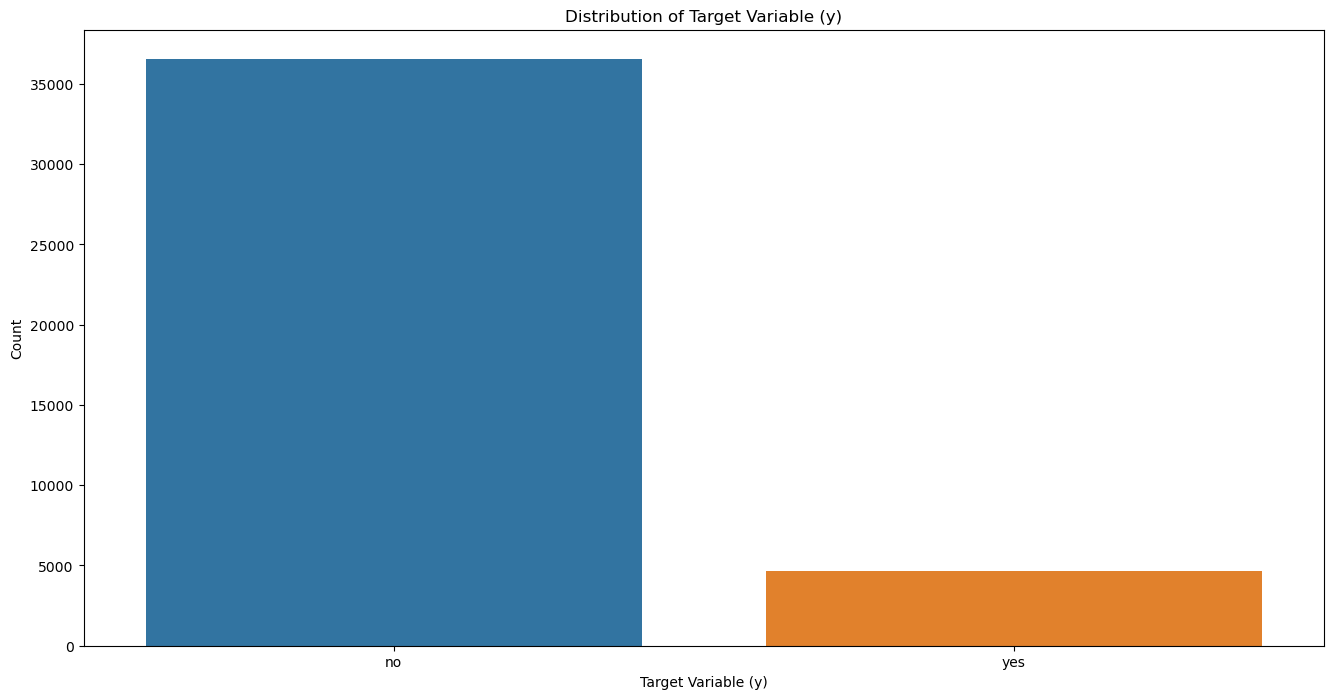

In [113]:
# Checking the distribution of the target variable 'y'
print(bank_df['y'].value_counts(normalize=True))

# Set the figure size for better readability
plt.figure(figsize=(16, 8))

# Create a count plot for the 'y' variable in the dataset
sns.countplot(x='y', data=bank_df)

# Add a title to the plot
plt.title('Distribution of Target Variable (y)')

# Label the x-axis
plt.xlabel('Target Variable (y)')

# Label the y-axis
plt.ylabel('Count')

# Display the plot
plt.show()


### 3.2 Do an analysis of the `Subscription Rate` variable wrt all the categorical variables

*Hint: Use normalized values to plot to avoid the class imbalance problem.*

In [117]:
# Loop through the columns and list all the categorical columns
categorical_cols = []
for col in bank_df.columns:
    if bank_df[col].dtype == 'object' and col != 'y':
        categorical_cols.append(col)
print(categorical_cols)


['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [118]:
bank_df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


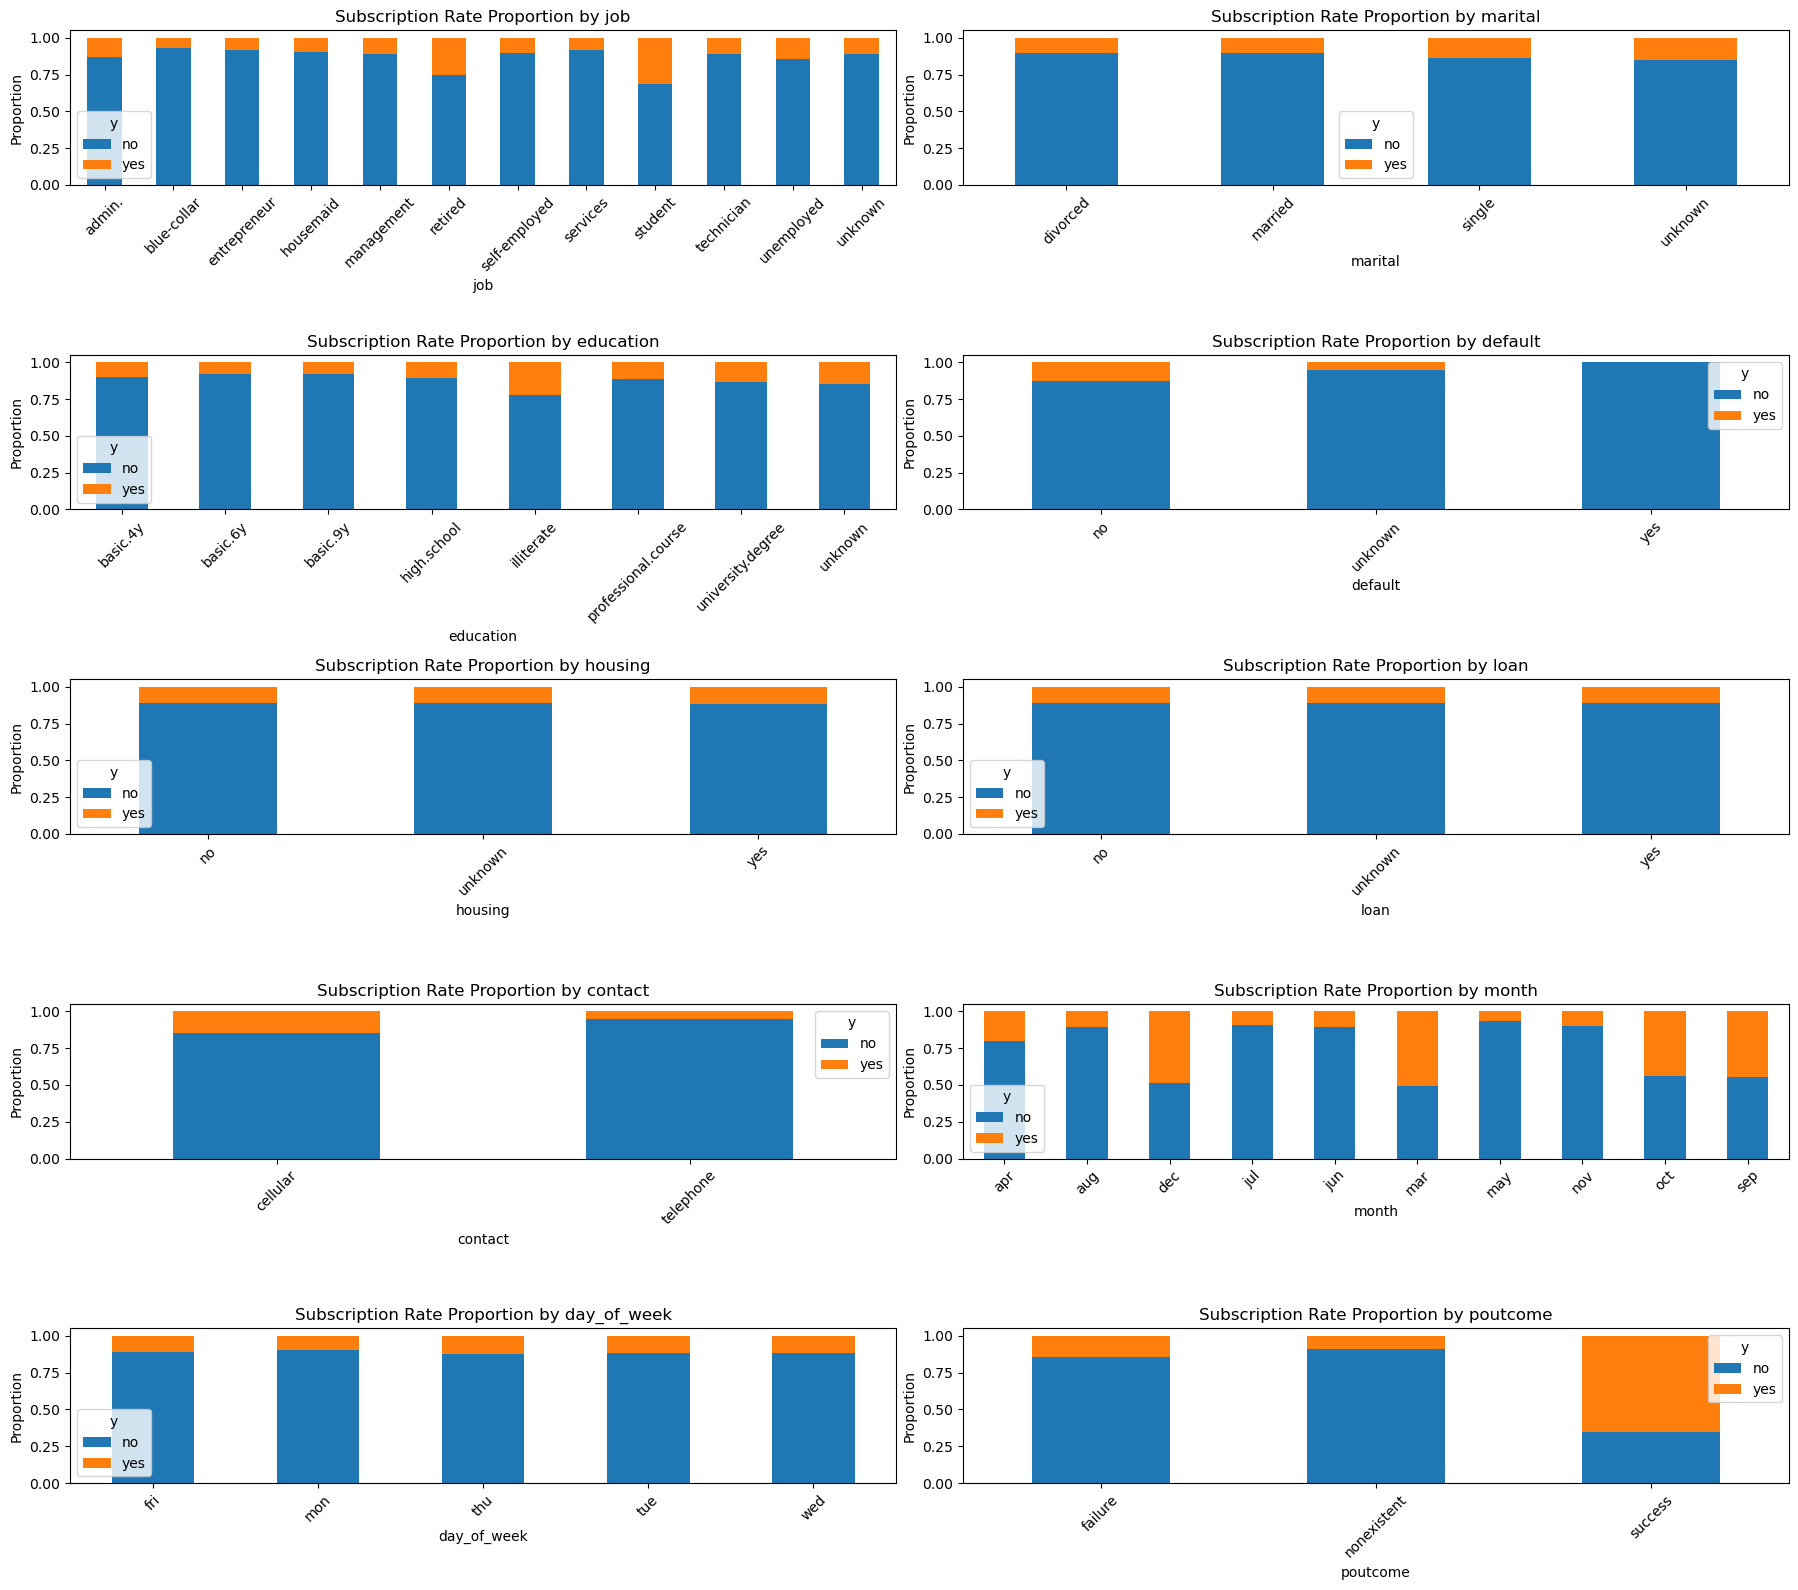

In [119]:
# Visualize the data
# Setting up the subplot grid
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 16))
axes = axes.flatten()

# Plotting each categorical feature in a subplot
for i, col in enumerate(categorical_cols):

    # Plotting the normalized counts as bar plots
    # plt.subplot(n_rows, n_cols, i + 1)
    # sns.barplot(x=bank_df[col].value_counts().index, y=bank_df[col].value_counts(normalize=True).values)
    normalized_counts = (
        bank_df.groupby(col)['y']
        .value_counts(normalize=True)
        .unstack()
    )

    # Plotting the normalized counts as bar plots
    normalized_counts.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], ax=axes[i])

    # Setting title and labels
    axes[i].set_title(f"Subscription Rate Proportion by {col}")
    axes[i].set_ylabel('Proportion')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better readability

# Adjusting layout
plt.tight_layout()
plt.show()

# STEP 4: Feature Engineering

### 4.1 Do a correlation analysis of the data

In [ ]:
# Correlation analysis of the dataset
# Set the figure size to make the heatmap more readable
plt.figure(figsize=(20, 16))

# Get only the numerical columns for correlation analysis
numerical_cols = bank_df.select_dtypes(include=[np.number]).columns

# Convert the target variable 'y' to numerical if it's not already
if bank_df['y'].dtype == 'object':
    bank_df['y'] = bank_df['y'].map({'yes': 1, 'no': 0})

# Add target column 'y' if not already included
if 'y' not in numerical_cols:
    numerical_cols = numerical_cols.append(pd.Index(['y']))

# Create a heatmap to visualize the correlation matrix for numerical features
sns.heatmap(bank_df[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

### 4.2 Plot a heat map for the top 3 highly correlated variables

In [ ]:
# Plot the Heat map for the top 3 correlated variables
# Set the figure size for better readability
plt.figure(figsize=(12, 8))
sns.heatmap(bank_df[['emp.var.rate', 'euribor3m', 'nr.employed']].corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Top 3 Correlated Features Heatmap')
plt.show()

# STEP 5: Feature Engineering

### 5.1 Create a new feature `pdays999`

Create a new binary feature `pdays999` that indicates whether the pdays value is 999.

In the context of marketing data, `pdays=999` often represents customers who were not previously contacted. This feature might be more informative than the raw pdays values.

In [ ]:
# Create a binary feature indicating if 'pdays' equals 999, which likely represents customers not previously contacted
bank_df['pdays_999'] = (bank_df['pdays'] == 999).astype(int)

# View the new feature created
print(bank_df[['pdays', 'pdays_999']].head())


## 5.2 Drop the original `pdays`column, `euribor3m`, `nr.employed` columns

In [ ]:
# Dropping the original 'pdays' column since it's now represented by 'pdays999'
bank_df.drop(columns=['pdays'], inplace=True)

# Dropping 'euribor3m', 'nr.employed' due to its high multicollinearity with  'emp.var.rate'
bank_df.drop(columns=['euribor3m', 'nr.employed'], inplace=True)

# Display the first few rows of the updated dataframe to verify changes
bank_df.head()


### 5.3 Add the `pdays999` column to the list of categorical columns already created

In [ ]:
# Append the column `pdays999` to the categorical columns list created already
categorical_cols.append('pdays_999')

# Check the list
print(categorical_cols)

### 5.4 Convert the categorical features to dummies and prepare for modelling

In [ ]:
# Create dummies for categorical variables
bank_df = pd.get_dummies(bank_df, columns=categorical_cols, drop_first=True)

# Check the data
bank_df.head()

### 5.5 Check for null values after the dummies creation & handle them if required

In [ ]:
# Checking for null values
print(bank_df.isnull().sum())

# STEP 6: Model Building

### 6.1 Split the data into train and test

In [ ]:
# Separate the features (X) from the target variable (y)
X = bank_df.drop(columns=['y_1'])
y = bank_df['y_1']

# NOTE: stratify=y will ensure that the train and test sets have the same proportion of classes as the original dataset.
# NOTE: To improve the data imbalance, SMOTE is a way to synthetically generate samples for the minority class.
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the data
print("Training set:")
print(X_train.head())
print(y_train.head())

print("\nTesting set:")
print(X_test.head())
print(y_test.head())


### 6.2 Build a Naive Bayes Classifier on the data


In [ ]:
# Import the module
from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')


### 6.3 Build a Decision Tree Classifier with 'gini' as the criterion for split


In [ ]:
# Import the library
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier with 'gini' as the criterion
dtc = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the classifier on the training data
dtc.fit(X_train, y_train)

# Predict on the test set
y_pred = dtc.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the classification report
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')


### 6.4 Build a Decision Tree Classifier with 'entropy' as the criterion for split




In [ ]:
# Initialize the Decision Tree classifier with 'entropy' as the criterion
dtc_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the classifier on the training data
dtc_entropy.fit(X_train, y_train)

# Predict on the test set
y_pred = dtc_entropy.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the classification report
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')